In [7]:
import xarray as xr
import fsspec
import matplotlib.pyplot as p
import numpy as np
from datetime import datetime

## Time Series

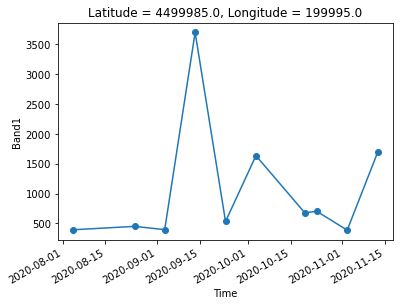

In [4]:
mapper = fsspec.get_mapper('s3://gstp-benchmark/zarr/s2_hypercube.zarr/', anon=True)
dataset = xr.open_zarr(mapper)
start = datetime.fromisoformat("2020-08-01") # Start Time
end = datetime.fromisoformat("2020-11-30") # End Time
timeserie = dataset['Band1'].sel(Time=slice(start,end), Longitude=199995, Latitude=4499985).compute() # Slice
timeserie.plot.line(marker="o") # Generate a plot

## Condensed Time Series (1 row on 2)

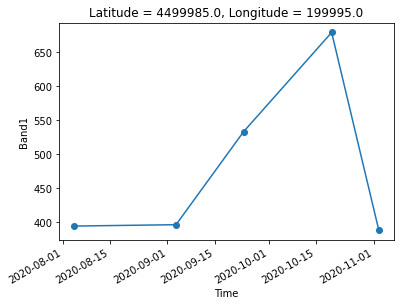

In [14]:
indexes = np.arange(0,dataset.Time.size,2) # From 0 to Max with a step of 2
condensed_band1 = timeserie.isel(Time=indexes).compute(); # Condense time axis (downscaling)
condensed_band1.plot.line(marker="o") # Generate a Plot